<a href="https://colab.research.google.com/github/AnnaLive2022/My-Data-Science-progects/blob/main/DS_PROD_1_%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BA_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%BA%D1%88%D0%B5%D0%BD%D1%83_%D0%B8_%D0%B4%D0%B5%D0%BF%D0%BB%D0%BE%D0%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [ ]:
# подключаем google диск, где у нас хранятся данные
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


после ************* для освежения в памяти

**В модуле по очистке данных вы уже производили очистку этого набора данных:**

удалили дубликаты,

удалили неинформативный признак Gender,

обработали «скрытые» пропуски в данных,

избавились от потенциальных выбросов.

In [ ]:
# Очищенный датасет
diabetes_cleaned = pd.read_csv('/content/drive/MyDrive/data/diabetes_cleaned.csv')
print(diabetes_cleaned.head(2))
diabetes_cleaned.info()

   Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6     98.0           58.0           33.0  34.0   
1            2    112.0           75.0           32.0  35.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.430   43        0  
1                     0.148   21        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    float64
 2   BloodPressure             757 non-null    float64
 3   SkinThickness             757 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  757 non-null    float64
 6   Age                       757 non-null    int64  
 7   Outcome                   757 non-null    int64  
dtypes: float64(5), int6

**Напомним, какие признаки у нас есть:**

Pregnancies — количество беременностей;

Glucose — концентрация глюкозы в плазме через два часа при пероральном

тесте на толерантность к глюкозе;

BloodPressure — диастолическое артериальное давление (мм рт. ст.);

SkinThickness — толщина кожной складки трицепса (мм);

BMI — индекс массы тела (\(вес \ в \ кг/(рост \ в \ м)^{2}\));

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, темвыше шанс наследственной заболеваемости);

Age — возраст;

Outcome — наличие диабета (0 — нет, 1 — да), целевой признак.

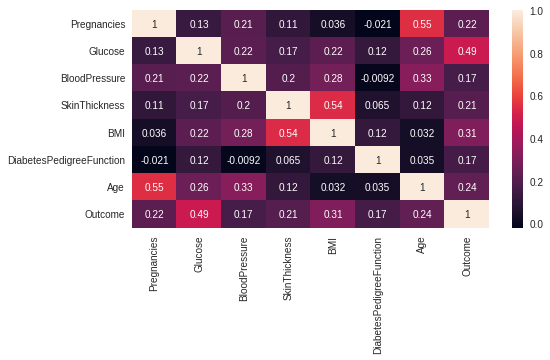

In [ ]:
# Давайте посмотрим на матрицу корреляций и выберем наиболее
# коррелированные с целевым признаком факторы:

fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_cleaned.corr(), annot=True);


Вывод: Из строки Outcome видно, что наибольшей корреляцией с целевым признаком
обладают факторы Glucose (уровень глюкозы) и BMI (индекс массы тела).

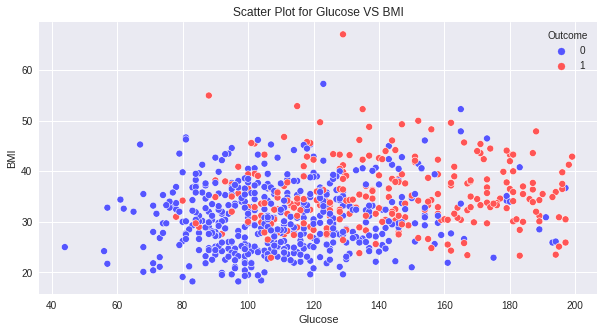

In [ ]:
# Построим диаграмму рассеяния, по оси абсцисс отложим фактор Glucose, а по оси
# ординат — BMI. Сделаем цветовую группировку по признаку наличия диабета:

fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
 data=diabetes_cleaned, #датасет 
 x='Glucose', #ось абсцисс
 y='BMI', #ось ординат
 hue='Outcome', #группировка
 palette='seismic', #палитра
 ax=ax, #координатная плоскость
);
#Задаём название графику
ax.set_title('Scatter Plot for Glucose VS BMI');


Вывод по диаграме: Видно, что классы довольно сильно перемешаны, но красные точки, соответствующие пациентам с диабетом, преимущественно сгруппированы в
правой части системы координат.

In [ ]:
# Для начала разделим выборку на матрицу наблюдений X, состоящую из двух
# признаков, и столбец с правильным ответами y:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_cleaned[['Glucose', 'BMI']]
y = diabetes_cleaned['Outcome']

In [ ]:
перед ************* для освежения в памяти

## **2. Сохранение и загрузка моделей: pickle и joblib**

### **ШАГ №1**

Обучим модель линейной регрессии на встроенном датасете о диабете — Diabetes dataset.

В данном датасете представлены десять исходных признаков: возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови были получены для каждого из 442 пациентов с сахарным диабетом. Интерес представляет количественный показатель прогресса заболевания, замеренный через год после исходного измерения. Тип задачи — регрессия.

Примечание. Для простоты и наглядности мы опустим процесс предобработки данных, разведывательный анализ, разделение выборки на обучающую и тестовую, валидацию модели и подбор гиперпараметров, так как для наших целей это неважно. Мы уверены, что вы уже способны произвести эти этапы самостоятельно.

In [ ]:
# В качестве модели, прогнозирующей целевую переменную, возьмём простейшую линейную регрессию, и обучим её на исходных данных:
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes

# Загружаем датасет о диабете
X, y = load_diabetes(return_X_y=True)
# Инициализируем модель линейной регрессии
regressor = LinearRegression()
# Обучаем модель
regressor.fit(X,y)

## LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [ ]:
regressor

LinearRegression()

Вывод: В результате выполнения кода получился объект класса LinearRegression, на который ссылается переменная regressor. При этом атрибуты объекта (веса модели линейной регрессии) были сформированы во время обучения. То есть объект regressor теперь является обученной моделью.

### **ШАГ №2**

Далее, когда мы получили обученную модель, нам необходимо **сериализовать** её, превратив объект Python в поток байтов. Для этого импортируем модуль pickle и воспользуемся функцией **dumps(),** в которую нужно передать объект Python.

In [ ]:
import pickle

# Производим сериализацию обученной модели
model = pickle.dumps(regressor) #  превращаем объект Python в поток байтов

print(type(model))
print(type(regressor))


<class 'bytes'>
<class 'sklearn.linear_model._base.LinearRegression'>


Вывод: Как видим, мы создали объект model типа bytes.

### **ШАГ №3**

Давайте попробуем **восстановить (десериализовать) объект Python**. Для этого в модуле pickle есть функция **loads()**, в которую нужно передать сериализованный объект (поток байтов).

In [ ]:
# Производим десериализацию
regressor_from_bytes = pickle.loads(model)
regressor_from_bytes
## LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

Вывод: В результате десериализации мы смогли восстановить исходный объект (модель).

### **ШАГ №4**

**Сохраним сериализованный объект прямо в файл**. Для этого в pickle есть функция **dump()** (без s на конце). В неё необходимо передать имя файла или ссылку на открытый файл. Файл назовём myfile, его расширение — .pkl (формат данных pickle):

In [ ]:
# Производим сериализацию и записываем результат в файл формата pkl
with open('myfile.pkl', 'wb') as output:
    pickle.dump(regressor, output)

### **ШАГ №5**

Посмотрим на код, который восстанавливает (десериализует) обученную модель из файла myfile.pkl. Для этого в pickle есть функция **load()** (без s на конце). В неё необходимо передать имя файла или ссылку на открытый файл.

In [ ]:
# Производим десериализацию и извлекаем модель из файла формата pkl
with open('myfile.pkl', 'rb') as pkl_file:
    regressor_from_file = pickle.load(pkl_file)

regressor_from_file
## LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

### **ШАГ №6**

Убедимся, что методы и результаты предсказаний обученной модели и модели, загруженной из файла, совпадают

In [ ]:
# Проверяем, что все элементы массивов предсказаний совпадают между собой
all(regressor.predict(X) == regressor_from_bytes.predict(X))
## True
all(regressor.predict(X) == regressor_from_file.predict(X))
## True

True

**Вывод**: Как видите, исходная и восстановленная из байтов и файла модели дают одинаковые предсказания. Это значит, что теперь мы можем импортировать наши обученные модели в любое Python-приложение и пользоваться ими, минуя этап обучения и все этапы, предшествующие ему.

### **ОГРАНИЧЕНИЯ**

Как мы упоминали, у pickle есть ограничения. Например, мы не можем сериализовать лямбда-функции. Давайте посмотрим, что нам вернёт следующий код:

In [ ]:
my_lambda = lambda x: x*2
with open('my_lambda.pkl', 'wb') as output:
    pickle.dump(my_lambda, output)
 
##"PicklingError: Can't pickle <function <lambda>"

**Совет.** В таких случаях лучше пользоваться пакетом **dill**.

### **СОХРАНЕНИЕ ПАЙПЛАЙНА**

Мы уже упоминали, что pickle работает с любыми объектами Python. Поэтому для сохранения может быть доступна не просто обученная модель, но и целый пайплайн, включающий предобработку данных.

Например, мы хотим сериализовать пайплайн, который включает в себя min-max-нормализацию и отбор пяти наиболее важных факторов на основе корреляции Пирсона. Полученные в результате данные отправляются на вход модели линейной регрессии.

In [ ]:
import pickle

from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

# Загружаем датасет о диабете
X, y = load_diabetes(return_X_y=True)

# Создаём пайплайн, который включает нормализацию, отбор признаков и обучение модели
pipe = Pipeline([  
  ('Scaling', MinMaxScaler()),
  ('FeatureSelection', SelectKBest(f_regression, k=5)),
  ('Linear', LinearRegression())
  ])

# Обучаем пайплайн
pipe.fit(X, y)

Pipeline(steps=[('Scaling', MinMaxScaler()),
                ('FeatureSelection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7fb23f5f5c10>)),
                ('Linear', LinearRegression())])

Пайплайн обучен. Давайте сохраним его в файл с помощью pickle:

In [ ]:
# Сериализуем pipeline и записываем результат в файл
with open('my_pipeline.pkl', 'wb') as output:
    pickle.dump(pipe, output)

Если сериализация завершилась успешно, то при инференсе модели мы сможем восстановить её из файла:

In [ ]:
# Десериализуем pipeline из файла
with open('my_pipeline.pkl', 'rb') as pkl_file:
    loaded_pipe = pickle.load(pkl_file)

Проверим, что результаты исходного и десериализованного пайплайнов и идентичны:

In [ ]:
# Сравниваем предсказания исходного и восстановленного пайплайнов
print(all(pipe.predict(X) == loaded_pipe.predict(X)))

## True

True


*Примечание.* Если мы хотим сохранять сериализованные пайплайны в виде потока байтов, нужно использовать функции dumps() и loads(), а не dump() и load().

Однако в процессе предобработки могут возникнуть шаги, которые нельзя реализовать стандартными методами sklearn. Например, для решения многих задач в нашем курсе мы часто использовали feature engineering, чтобы повысить качество работы моделей. Как встроить этот шаг в исходный пайплайн?

Для этого в sklearn можно организовать так называемые **кастомные трансформеры**. Такой трансформер должен наследоваться от двух классов: TransformerMixin и BaseEstimator.

*Посмотрим на шаблон кастомного трансформера:*

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
class MyTransformer(TransformerMixin, BaseEstimator):
    '''Шаблон кастомного трансформера'''
 
    def __init__(self):
        '''
        Здесь прописывается инициализация параметров, не зависящих от данных.
        '''
        pass
 
    def fit(self, X, y=None):
        '''
        Здесь прописывается «обучение» трансформера.
        Вычисляются необходимые для работы трансформера параметры (если они нужны).
        '''

        return self
 
    def transform(self, X):
        '''
        Здесь прописываются действия с данными.
        '''
        return X


***У трансформера должно быть три обязательных метода: ***

**__init__()** — метод, который вызывается при создании объекта данного класса. Он предназначен для инициализации исходных параметров.
Например, у трансформера для создания полиномиальных признаков PolynomialFeatures из sklearn в методе __init__() параметр degree задаёт степень полинома.

**fit() **— метод, который вызывается для «обучения» трансформера. Он должен возвращать ссылку на сам объект (self).
Например, в трансформере StandardScaler в методе fit() прописано вычисление среднего значения и стандартного отклонения в каждом столбце таблицы, переданной в качестве параметра метода fit().

**transform()** — метод, который трансформирует приходящие на вход данные. Он должен возвращать преобразованный массив данных.
Например, при вызове метода transform() у StandardScaler из sklearn внутри происходит преобразование — вычитание из каждого столбца среднего и деление результата на стандартное отклонение. Причём среднее и стандартное отклонение вычисляются заранее в методе fit().

**Примечание.** Как мы знаем, у некоторых трансформеров из sklearn, например у того же MinMaxScaler, есть ещё и метод fit_transform(), который является комбинацией методов fit() и transform().

Наш трансформер пока что ничего не делает. **Предположим, мы хотим генерировать в данных новый признак, который является простым произведением первых трёх столбцов таблицы. Давайте пропишем в методе transform() эти действия.**

Для работы такого трансформера нужны только исходные данные без дополнительных параметров, поэтому методы __init__() и fit() остаются без изменений.

In [ ]:
class MyTransformer(TransformerMixin, BaseEstimator):
    '''Шаблон кастомного трансформера'''


    def __init__(self):
        '''Здесь прописывается инициализация параметров, не зависящих от данных.'''
        pass


    def fit(self, X, y=None):
        '''
        Здесь прописывается «обучение» трансформера.
        Вычисляются необходимые для работы трансформера параметры (если они нужны).
        '''
        return self


    def transform(self, X):
        '''Здесь прописываются действия с данными.'''
        # Создаём новый столбец как произведение первых трёх
        new_column = X[:, 0] * X[:, 1] * X[:, 2]
        # Для добавления столбца в массив нужно изменить его размер на (n_rows, 1)
        new_column = new_column.reshape(X.shape[0], 1)
        # Добавляем столбец в матрицу измерений
        X = np.append(X, new_column, axis=1)
        return X

Посмотрим, как работает наш кастомный трансформер. Создадим объект трансформера, вызовем метод transform и посмотрим на результирующий размер таблицы.

In [ ]:
import numpy as np

In [ ]:
# Инициализируем объект класса MyTransformer (вызывается метод __init__)
custom_transformer = MyTransformer()
# Чисто формально вызываем метод fit, но у нас он ничего не делает
custom_transformer.fit(X)
# Трансформируем исходные данные (вызывается метод transform)
X_transformed = custom_transformer.transform(X)
print('Shape before transform: {}'.format(X.shape))
print('Shape after transform: {}'.format(X_transformed.shape))

## Shape before transform: (442, 10)
## Shape after transform: (442, 11)

Shape before transform: (442, 10)
Shape after transform: (442, 11)


Видно, что в результате трансформации в исходную матрицу наблюдений добавился новый столбец.

Теперь давайте встроим этот трансформер в сам пайплайн — для этого достаточно добавить новый шаг в пайплайн.

In [ ]:
# Создаём пайплайн, который включает Feature Engineering, нормализацию, отбор признаков и обучение модели
pipe = Pipeline([  
  ('FeatureEngineering', MyTransformer()),
  ('Scaling', MinMaxScaler()),
  ('FeatureSelection', SelectKBest(f_regression, k=5)),
  ('Linear', LinearRegression())
  ])

# Обучаем пайплайн
pipe.fit(X, y)

Pipeline(steps=[('FeatureEngineering', MyTransformer()),
                ('Scaling', MinMaxScaler()),
                ('FeatureSelection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7fb23f5f5c10>)),
                ('Linear', LinearRegression())])

Наконец можно сериализовать полученный pipeline:

In [ ]:
# Сериализуем pipeline и записываем результат в файл
with open('my_new_pipeline.pkl', 'wb') as output:
    pickle.dump(pipe, output)

Теперь мы можем передать пайплайн и воспользоваться им для инференса, предварительно произведя десериализацию.

**Задание 2.5**

Десериализуйте полученный pipeline с добавленным в него кастомной трансформации из файла. Затем предскажите значение целевой переменной для наблюдения, которое описывается следующим вектором:

features = np.array([[ 0.00538306, -0.04464164,  0.05954058, -0.05616605,  0.02457414, 0.05286081, -0.04340085,  0.05091436, -0.00421986, -0.03007245]])

In [ ]:
# Десериализуем pipeline из файла
with open('my_new_pipeline.pkl', 'rb') as pkl_file:
    loaded_pipe = pickle.load(pkl_file) 
    
features =np.array([[ 0.00538306, -0.04464164,  0.05954058, -0.05616605,  0.02457414, 0.05286081, -0.04340085,  0.05091436, -0.00421986, -0.03007245]])
 
# Формируем предсказание
print(np.round(loaded_pipe.predict(features)))

[173.]


### **БИБЛИОТЕКА JOBLIB**

Как мы видим, pickle прекрасно справляется со своей задачей: мы можем сериализовать и восстанавливать любые Python-объекты, включая модели и даже пайплайны. Однако иногда массивы данных, на которых обучаются модели, бывают настолько большими, что после загрузки из pickle невозможно восстановить объект полностью.

В таких случаях вместо pickle лучше использовать библиотеку joblib. Этот модуль более эффективен и надёжен для работы с объектами, которые содержат большие массивы данных. Пожалуй, единственный минус этого модуля в том, что он может «консервировать» только в файл, поэтому вы не сможете получить объект в виде бинарной строки и работать с ним. В модуле попросту отсутствуют методы для работы с бинарной строкой. Формат файлов для сохранения — .joblib.

В остальном работа с joblib полностью идентична работе с pickle: после обучения модели производим сериализацию с помощью функции dump(), а в коде самого приложения, где нужно использовать модель, выполняем десериализацию с помощью функции load(). В каждую из этих функций необходимо передать путь до файла для записи и чтения соответственно.

Для иллюстрации работы сохраним полученную линейную регрессию:

In [ ]:
import joblib

# Загружаем датасет о диабете
X, y = load_diabetes(return_X_y=True)
# Обучаем модель линейной регрессии
regressor = LinearRegression()
regressor.fit(X, y)
# Производим сериализацию и сохраняем результат в файл формата .joblib
joblib.dump(regressor, 'regr.joblib')

## ['regr.joblib']

['regr.joblib']

Загрузим файл заново (загрузка может быть произведена в другом файле с кодом):

In [ ]:
# Десериализуем модель из файла
clf_from_jobliv = joblib.load('regr.joblib') 
# Сравниваем предсказания
all(regressor.predict(X) == clf_from_jobliv.predict(X))

## True

True

## **3. Практика: pickle**

Ваш коллега Василий обучил модель и теперь просит вас проверить её на ваших данных. Он присылает вам pickle-файл. Загрузите модель, используя модуль pickle.

In [ ]:
# Десериализуем pipeline из файла
with open('/content/drive/MyDrive/data/model.pkl', 'rb') as pkl_file:
    model = pickle.load(pkl_file)

secret word: skillfactory
how is this possible? answer is here: https://youtu.be/xm-A-h9QkXg


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Проверьте, объект какого типа получился. Какую модель вам прислал коллега?
type(model)

sklearn.linear_model._base.LinearRegression

**Задание 3.3**

Теперь необходимо применить модель. Сделайте предсказание для следующего набора фичей: [1, 1, 1, 0.661212487096872]. Введите результат, предварительно округлив его до трёх знаков после точки-разделителя.

In [ ]:
print(model.predict([[1, 1, 1, 0.661212487096872]]))

[0.666]


У присланной вам модели есть два поля (атрибута) с именами a и b. Создайте из них словарь с такими же именами ключей и значениями, а затем сохраните его в файл с помощью модуля pickle.

Чтобы вы могли проверить правильность решения задания, мы создали специальный проверочный скрипт. Скачайте его здесь.

Сохраните его рядом с вашим pickle-файлом (в той же папке) и запустите, передав первым аргументом имя файла. Если вы всё сделали правильно, на экран выведется ответ для следующего задания.

In [ ]:
# У присланной вам модели есть два поля (атрибута) с именами a и b. 
# Создайте из них словарь с такими же именами ключей и значениями, а затем сохраните его в файл с помощью модуля pickle.
my_dict = {'a': model.a, 'b': model.b}
with open('my_dict.pkl', 'wb') as pkl_file:
  pickle.dump(my_dict, pkl_file)


In [ ]:
# КАК ЗАПУСТИТЬ СКРИПТ?
# В ячейке Jupyter Notebook:

# !python hw1_check_ol.py имя_pickle_файла.pkl
# Если вы всё сделали правильно, в результате выполнения проверочного скрипта будет выведен секретный код(3c508)
!python hw1_check_ol.py my_dict.pkl

('secret code 2:', '3c508')


## **4. Сохранение и загрузка моделей: PMML и ONNX-ML**

### **PREDICTIVE MODEL MARKUP LANGUAGE**

Среда или требования к инференсу модели для вашего проекта могут быть устроены так, что потребуют реализации на языке программирования, отличном от Python. Например, если компания разрабатывает десктопное приложение, то для внедрения модели её потребуется «перевести» на Java или C++. Как это сделать?

В таких случаях используется генерация файла формата PMML (Predictive Model Markup Language).

PMML — это XML-диалект, который применяется для описания статистических и DS-моделей. PMML-совместимые приложения позволяют легко обмениваться моделями данных между собой. Разработка и внедрение PMML осуществляется IT-консорциумом Data Mining Group.

К сожалению, далеко не все библиотеки для машинного обучения (в том числе sklearn) поддерживают возможность сохранения обученной модели в указанном формате. Однако для этого можно использовать сторонние библиотеки, и одной из самых популярных является Nyoka.

Давайте сохраним модель из предыдущего блока в формат PMML.

Для установки можно использовать систему управления пакетами pip:

!pip3 install nyoka

In [ ]:
!pip3 install nyoka

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.8/303.8 KB 21.3 MB/s eta 0:00:00


In [ ]:
from nyoka import skl_to_pmml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
cols = load_diabetes()['feature_names']

scaler = MinMaxScaler()
pipe = Pipeline([  
            ('Scaling', MinMaxScaler()),
            ('Linear', LinearRegression())
        ])
# Обучение пайплайна, включающего линейную модель и нормализацию признаков
pipe.fit(X, y)

# Сохраним пайплайн в формате pmml в файл pipeline.pmml
skl_to_pmml(pipeline=pipe, col_names=cols, pmml_f_name="pipeline.pmml")

Вывод: Итак, мы построили пайплайн обработки данных и обучили модель линейной регрессии. После этого мы с помощью функции skl_to_pmml сохранили модель в файл pipe.pmml.

Давайте рассмотрим этот файл подробнее:

Секция <DataDictionary> содержит информацию о признаках, включая наименование и тип данных, используемых для построения модели.

Секция <TransformationDictionary> содержит информацию о необходимых преобразованиях для каждого признака. Обратите внимание, что в этом блоке также содержится информация для трансформации. Так как мы использовали minMaxScaler(), то в файле записаны минимальное и максимальное значения.

Какая секция содержит информацию о типе используемой модели?
<RegressionModel>
  верно 


***Вывод:*** Таким образом, в файле содержится вся информация для того, чтобы пайплайн можно было использовать на любом языке программирования.

## **OPEN NEURAL NETWORK EXCHANGE**

В разработке моделей на основе нейронных сетей сегодня наиболее распространён формат ONNX (Open Neural Network Exchange)-Открытый обмен нейронными сетями.

*ONNX (Open Neural Network Exchange)* — это открытый стандарт для обеспечения совместимости моделей машинного обучения. Он позволяет разработчикам искусственного интеллекта использовать модели с различными инфраструктурами, инструментами, средами исполнения и компиляторами.

Часто стандарт ONNX и его библиотеки используют для конвертации из одного фреймворка в другой (например, из PyTorch в TensorFlow для использования в продакшене). Для конвертации различных фреймворков (не только DL) в формат ONNX и обратно существует ряд библиотек:

ONNX-Tensorflow;

Tensorflow-ONNX;

Keras-ONNX;

Sklearn-ONNX.

и другие.

Также в рамках стандарта ONNX есть инструмент ONNX-runtime. Он служит для ускорения инференса Python-моделей, а также инференса на других языках, например Java, C++.

### *Задание 4.6 (со звёздочкой)

В задаче ниже мы обучаем модель sklearn, конвертируем ее в ONNX и делаем инференс через ONNX-runtime.

Дополните код ниже недостающими элементами:

In [ ]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install skl2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import onnxruntime as rt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType


# загружаем данные
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(X_train.shape, X_test.shape)

(379, 13) (127, 13)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train

In [ ]:
# делаем инференс моделью на тесте
test_pred = model.predict(X_test)
print('sklearn model predict:\n', test_pred)

In [ ]:
# конвертируем модель в ONNX-формат
from skl2onnx import convert_sklearn
initial_type = [('float_input', FloatTensorType([None, 13]))]
model_onnx = convert_sklearn(model, initial_types=initial_type)

In [ ]:
# сохраняем модель в файл
with open("model.onnx", "wb") as f:
	f.write(model_onnx.SerializeToString())

In [ ]:
# Делаем инференс на тесте через ONNX-runtime
sess = rt.InferenceSession("model.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
test_pred_onnx = sess.run([label_name],
                	{input_name:  X_test.astype(np.float32)})[0].reshape(-1)
print('onnx model predict:\n',test_pred_onnx)

onnx model predict:
 [23.190351  18.979858  19.825487  19.001259   4.395239  11.9023
 21.2487    28.644491  29.035498  13.906446   6.414221  32.65357
 18.998844  20.015694  37.152752  22.804852  29.045296  33.042007
 10.486018  24.454721  21.330692  27.602219  37.521187  13.611357
  9.564424  15.033682  35.597557  26.010174  25.5243    27.063213
 19.076801  30.547466  31.275612  16.401329  39.76707   20.272642
 18.949343  17.122097  21.62628   28.151012  26.952927  19.143528
 14.506642  25.780756  18.504599  13.934391  24.965929  19.124313
 20.678047   6.2380714 27.714602  26.746176  11.833615  40.108547
 14.665232  22.120237  20.343056  20.378616  23.566854  21.915827
 20.797482  35.431236  17.325922  20.920773  24.167416  43.381996
 19.597473  20.116247  22.354626  28.125067  25.538322  12.889493
 13.155264  33.309242  26.126667  22.541353  12.144042  16.61972
 28.52703   17.819328  24.426376  27.698248  23.052965  24.440285
 27.232338  30.42106   24.047182  19.887442  31.131605  21.

In [ ]:
# всё вместе
import onnxruntime as rt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType


# загружаем данные
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(X_train.shape, X_test.shape)

# обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# делаем инференс моделью на тесте
test_pred = model.predict(X_test)
print('sklearn model predict:\n', test_pred)

# конвертируем модель в ONNX-формат
initial_type = [('float_input', FloatTensorType([None, 13]))]
model_onnx = convert_sklearn(model, initial_types=initial_type)

# сохраняем модель в файл
with open("model.onnx", "wb") as f:
	f.write(model_onnx.SerializeToString())
 	 
# Делаем инференс на тесте через ONNX-runtime
sess = rt.InferenceSession("model.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
test_pred_onnx = sess.run([label_name],
                	{input_name:  X_test.astype(np.float32)})[0].reshape(-1)
print('onnx model predict:\n',test_pred_onnx)

(379, 13) (127, 13)
sklearn model predict:
 [23.1903541  18.97985889 19.82548836 19.00126197  4.39524325 11.90230303
 21.24870187 28.64449553 29.03550064 13.90644782  6.41422339 32.65356658
 18.99884691 20.01569489 37.15275422 22.80485488 29.04529555 33.04200949
 10.48602033 24.45472284 21.33069324 27.60222354 37.52118276 13.6113556
  9.56442243 15.03368415 35.5975585  26.01017573 25.52430154 27.06321433
 19.07680237 30.54746571 31.27561168 16.40132981 39.76707419 20.27263903
 18.94934061 17.12210014 21.6262832  28.15101424 26.95292863 19.14352801
 14.50664721 25.78075705 18.50460146 13.93439214 24.96593139 19.12431756
 20.6780475   6.23807397 27.71460362 26.74617711 11.83361779 40.10855118
 14.66523328 22.12023896 20.34305401 20.3786179  23.56685605 21.91582872
 20.79748126 35.43123681 17.32592458 20.92077502 24.1674162  43.38199388
 19.59747681 20.11624895 22.35462757 28.12506906 25.53832602 12.88949504
 13.1552648  33.3092473  26.12666965 22.54135443 12.14404271 16.61972119
 28.5270

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## **5. Деплой модели. Протоколы сетевого взаимодействия**

Завтра Василию предстоит защищать решение перед руководителями проекта, а для этого нужно показать работающий прототип (в нашем случае — задеплоить модель на тестовый сервер) и рассказать об эффективности предлагаемого решения. За деплоем Василий обратился к вам.

### *МОДЕЛИ СЕТЕВОГО ВЗАИМОДЕЙСТВИЯ*

Наиболее известные модели сетевого взаимодействия — OSI и TCP/IP.

**IP** — протокол сетевого уровня. Он определяет путь, по которому передаются данные.

**TCP** — соответствует транспортному уровню, а значит, определяет, как передаются данные.

**HTTP** — относится к прикладному уровню, описывающему взаимодействие приложений с сетью.

**IP**

IP (Internet Protocol) — один из главных протоколов сетевого взаимодействия. Он отвечает за маршрутизацию трафика по сети, то есть определяет путь, по которому отправятся данные. Данные передаются пакетами (или датаграммами), которые формирует протокол IP.

Уникальность IP-адреса может быть глобальной (в рамках всего интернета) или локальной (в рамках локальной подсети). Некоторые IP-адреса не являются общедоступными и зарезервированы для специальных целей, например диапазоны IP-адресов:

127.0.0.1–127.255.255.255	используются для связи внутри локальной машины (localhost)

172.16.0.1–172.31.255.255	используются для частных подсетей (недоступных из интернета)

198.18.0.1–198.19.255.254	используются для тестирования производительности

**localhost** — зарезервированное доменное имя для IP-адресов из диапазона 127.0.0.1–127.255.255.255 (в сети из одного компьютера — для 127.0.0.1).

**TCP**

TCP (Transmission Control Protocol) — протокол транспортного уровня. Он отвечает за управление передачей данных и гарантирует:

доставку пакетов (посылает пакеты повторно, если они не были доставлены);
последовательность и целостность доставки пакетов (используя нумерацию и контрольные суммы для проверки);
устраняет дубликаты в случае необходимости.

*Важной особенностью TCP* является то, что перед отправкой данных он «устанавливает соединение» с получателем — обменивается управляющей информацией. После отправки пакетов источник ждёт подтверждения от получателя, что пакеты были доставлены.

Обычно на одном узле сети (сервере, компьютере) работают несколько приложений/процессов одновременно. Для идентификации приложения на источнике и получателе используется порт, который задаётся целым неотрицательным числом. Процесс или приложение могут зарезервировать у ОС определённый порт, например, для передачи данных по сети.

Порты разделяют на **системные (0–1023), и пользовательские (1024–49151)**. Некоторые номера портов определены для конкретных приложений, например:

22 — протокол SSH для безопасной передачи данных;

25 — протокол SMTP для незащищённой передачи e-mail-сообщений;

80 — протокол HTTP.


**Например**, если приложение доступно по адресу 172.16.0.11:8001, это значит следующее:

172.16.0.11 — IP-адрес;
8001 — TCP-порт, отведённый приложению.

**HTTP**

HTTP — это наиболее широко используемый протокол. Все сайты, на которые вы заходите, работают по этому протоколу. Он был разработан именно для передачи содержимого HTML-страниц в интернете, но впоследствии стал использоваться и для других целей. Например, HTTP применяется для налаживания взаимодействия между сервисами в сложных системах. Этим он нам и интересен.

Итак, **HTTP** — это протокол, который работает по принципу клиент-сервер.

Запрос состоит из трёх частей.

***Стартовая строка, или Request Line*** — по ней определяется вид запроса.

***Заголовки запроса, или Request Headers***  — дополнительные параметры запроса, в которых обычно передаётся служебная информация, например в каком формате ожидается ответ или информация о клиенте.

***Тело запроса, или Request Message Body*** — содержит данные для передачи. Эта часть присутствует не всегда.

**Основные методы:**

GET — обычно означает получение содержимого ресурса и не содержит тела.

Например, когда вы заходите в каталог интернет-магазина, вы получаете страницу с товарами — ваш браузер отправляет GET-запрос на сервер интернет-магазина.

POST — наоборот, передача данных ресурсу.

Например, когда вы заполняете форму авторизации на любом сайте и нажимаете кнопку для отправки своих данных, вы совершаете POST-запрос на сервер ресурса.

PUT — обновление ресурса.
DELETE — удаление ресурса.

404 — это как раз код состояния, означающий, что ресурса с заданным URI не существует на сервере.

**Группы кодов состояния ответа HTTP-сервера делятся на следующие группы:**

информационные (100–199);

успешно (200–299);

перенаправление (300–399);

ошибка клиента (400–499);

ошибка сервера (500–599).

**REST (REPRESENTATIONAL STATE TRANSFER)**

Он даёт более верхнеуровневые указания, чем HTTP-протокол, а именно:

как правильно организовывать адресацию к ресурсам;

какие методы у этих ресурсов должны быть;

какой ожидается результат.

Основная концепция философии REST заключается в том, что клиентом RESTful-сервера может быть что/кто угодно: браузер, другое приложение, разработчик. Веб-приложение, спроектированное по правилам REST, предоставляет информацию о себе в форме информации о своих ресурсах.

Ресурс может быть любым объектом, о котором сервер предоставляет информацию. Например, в API Instagram ресурсом может быть пользователь, фотография, хэштег. Каждая единица информации (ресурс) однозначно определяется URL.

GET-запрос /rest/users — получение информации обо всех пользователях.

GET-запрос /rest/users/125 — получение информации о пользователе с id=125.

POST-запрос /rest/users — добавление нового пользователя.

PUT-запрос /rest/users/125 — изменение информации о пользователе с id=125.

DELETE-запрос /rest/users/125 — удаление пользователя с id=125.

## **6. Деплой модели. Обзор фреймворков**

**FLASK**

Flask позиционируется как микрофреймворк для написания легковесных сервисов, но при этом он достаточно гибкий и кастомизируемый, что позволяет использовать его в проектах любой сложности. Как и все остальные фреймворки, он работает на основе маршрутизации запросов, приходящих на сервер, который и должен обработать эти запросы.

В случае с Flask маршрутизация выглядит как обычные функции Python, которые вы помечаете специальным декоратором **@app.route**.

для написания минимально функционального сервера достаточно добавить в скрипт всего несколько строк: необходимые импорты, создание Flask-приложения, декоратор, который свяжет адрес (endpoint, **эндпоинт)** с функцией, и запуск приложения. 

**DJANGO**

В отличие от Flask, Django нельзя назвать микрофреймворком. Напротив, даже минимальный проект для Django обычно генерируется специальными скриптами и включает с десяток файлов и папок.

Django используют, когда нужно что-то посерьёзней, например целые сайты с базами данных.

*ПРЕИМУЩЕСТВА DJANGO:*

Мощный движок для рендера HTML-страниц, основанный на шаблонах.

Собственный ORM.

Огромное количество дополнительных плагинов. Один из них практически так же популярен, как и сам Django — речь о Django Rest Framework. Основываясь на ORM, он позволяет в несколько строк реализовывать эндпоинты протокола RESTful. Сам Django Rest Framework также имеет множество расширений. Благодаря этому написание сложного проекта можно свести в составлению правильной модели данных, установке и настройке подходящих расширений.

**FLASK VS DJANGO**

 Django, вы оставляете проект со всей экосистемой Django, и что-то изменить впоследствии будет трудно. Выбирая Flask, вы получаете систему, построенную из блоков, каждый из которых проще заменить.

**FASTAPI**

Основное нововведение в FastAPI — интеграция библиотеки pydantic, которая позволяет декларативно описывать структуры запросов.

## **7. Пишем сервер на Flask**

**ЧАСТЬ I. ИНИЦИАЛИЗАЦИЯ ВЕБ-ПРИЛОЖЕНИЯ**